# Mise en forme des données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler # for data standardization
from sklearn.decomposition import PCA # for PCA analysis
import seaborn as sns
'''
df = pd.DataFrame(pd.read_csv("./data_csv/AilanteBilan.csv"))
df1 = pd.DataFrame(pd.read_csv("./data_csv/CanneBilan.csv"))
df2 = pd.DataFrame(pd.read_csv("./data_csv/MimosaBilan.csv"))

# Supprimer les données vides
df = df.drop(['Nombre rameaux', 'Réplicat'], axis = 1)
df = df.dropna(subset=['Hauteur', 'Nb feuilles','Nombre'])

df1 = df1.drop(['Nombre rameaux', 'Réplicat '], axis = 1)
df1 = df1.dropna(subset=['Hauteur', 'Nb feuilles','Nombre'])

df2 = df2.drop(['Nombre rameaux','Nombre nœuds', 'Réplicat'], axis = 1)
df2 = df2.dropna(subset=['Hauteur', 'Nb feuilles','Nombre'])

df = pd.concat([df,df1])
df = pd.concat([df,df2])


NA1 = []
NA2 = []
sol = []
temoin = []
invasive = []
SII =[]

for row in df['Traitement'] :
    if row == 'NA1' or row == 'NA1+sol':
        NA1.append(1)
    else :
        NA1.append(0)
    
    if row == 'NA2' or row == 'NA2+sol':
        NA2.append(1)
    else :
        NA2.append(0)
        
    if row == 'NA1+sol' or row == 'Sol' or row == 'NA2+sol' or row == 'sol':
        sol.append(1)
    else :
        sol.append(0)

    if row == 'Témoin' :
        temoin.append(1)
    else :
        temoin.append(0)
        
    if row == 'Invasives' :
        invasive.append(1)
    else :
        invasive.append(0)
     
    if row == 'Sol invasives (inversion)' :
        SII.append(1)
    else :
        SII.append(0)
        
tmp = df['Hauteur']
hauteur = []
for row in tmp :
    hauteur.append(row)

tmp = df['Date']
date = []
for row in tmp :
    date.append(row)
    
tmp = df['Nb feuilles']
nbf = []
for row in tmp :
    nbf.append(row)

tmp = df['Nombre']
nb = []
for row in tmp :
    nb.append(row)
tmp = df['Station']
station  = []
for row in tmp :
    station.append(row)

dataf = pd.DataFrame({'Station' :  pd.Series(station) ,'NA1' : pd.Series(NA1), 'NA2' : pd.Series(NA2), 'Sol' : pd.Series(sol),'témoin' : pd.Series(temoin),'invasive' : pd.Series(invasive),'SII' : pd.Series(SII), 'hauteur' : pd.Series(hauteur), 'nombre feuilles' : pd.Series(nbf), 'date' : pd.Series(date), 'nombre' : pd.Series(nb)})


dataf.to_csv('./data_csv/shaped_data.csv',header=True,index=False)
'''



'\ndf = pd.DataFrame(pd.read_csv("./data_csv/AilanteBilan.csv"))\ndf1 = pd.DataFrame(pd.read_csv("./data_csv/CanneBilan.csv"))\ndf2 = pd.DataFrame(pd.read_csv("./data_csv/MimosaBilan.csv"))\n\n# Supprimer les données vides\ndf = df.drop([\'Nombre rameaux\', \'Réplicat\'], axis = 1)\ndf = df.dropna(subset=[\'Hauteur\', \'Nb feuilles\',\'Nombre\'])\n\ndf1 = df1.drop([\'Nombre rameaux\', \'Réplicat \'], axis = 1)\ndf1 = df1.dropna(subset=[\'Hauteur\', \'Nb feuilles\',\'Nombre\'])\n\ndf2 = df2.drop([\'Nombre rameaux\',\'Nombre nœuds\', \'Réplicat\'], axis = 1)\ndf2 = df2.dropna(subset=[\'Hauteur\', \'Nb feuilles\',\'Nombre\'])\n\ndf = pd.concat([df,df1])\ndf = pd.concat([df,df2])\n\n\nNA1 = []\nNA2 = []\nsol = []\ntemoin = []\ninvasive = []\nSII =[]\n\nfor row in df[\'Traitement\'] :\n    if row == \'NA1\' or row == \'NA1+sol\':\n        NA1.append(1)\n    else :\n        NA1.append(0)\n    \n    if row == \'NA2\' or row == \'NA2+sol\':\n        NA2.append(1)\n    else :\n        NA2.appen

Nous nous intéresserons à l'évolution des plantes au cours du temps.
Cependant, ne pouvant pas faire matcher les lignes unes à unes grâce aux dates car il n'y pas pas le même nombre de mesure à chaque date. Nous allons donc nous servir du fichier __Resume.csv__ afin de pouvoir calculer la variation sur l'évolution des plantes.


Pour des raison de simplification du code , les dates 03.11.2021 et 24.05.2022 ont été remplacées respectivement par 04.11.2021 et 23.05.2022

In [3]:

# lecture du fichier contenant le resumé des mesures des EEE sur 3 périodes

df = pd.read_csv("data/data_csv/Resume.csv")
#df = df.dropna(subset = ['Nombre','Moyenne Hauteur','Moyenne Nf'])

#Remplacer les NaN par 0 et conversion des valeurs des colonnes 
df.fillna(0,inplace = True)
df['Moyenne Hauteur'] = df['Moyenne Hauteur'].astype(float)
df['Moyenne Nf'] = df['Moyenne Nf'].astype(float)
df['Nombre'] = df['Nombre'].astype(float)

# calcul de la variation des métriques entre les différentes dates par station et par traitement
station = ['1M','1C','3A']
traitement= ['NA1','NA2', 'NA1+Sol', 'NA2+Sol', 'Sol' ,'Invasives','Témoin']

dff  = pd.DataFrame(columns=['Station', 'Traitement', 'Compost', 'Réplicat','Nombre','Moyenne Hauteur', 'Moyenne Nf' , 'Date initiale', 'Date finale'])
for s in station :
    for t in traitement :
        df_t1 = df.loc[(df['Date'] == '06.2021') & (df['Station'] == s) & (df['Traitement'] == t)].reset_index(drop = True)

        df_t = df.loc[(df['Date'] == '04.11.2021') & (df['Station'] == s) & (df['Traitement'] == t)].reset_index(drop = True)

        df21 = pd.concat([df_t[['Station','Traitement', 'Compost', 'Réplicat']],df_t.iloc[ : ,[5,6,7]] - df_t1.iloc[: , [5,6,7]],df_t1['Date']],axis = 1)
        df21 = df21.rename(columns ={'Date' : 'Date initiale'})

        df21 = pd.concat([df21,df_t['Date']],axis = 1)
        df21 = df21.rename(columns ={'Date' : 'Date finale'})

        df_t1 = df.loc[(df['Date'] == '04.11.2021') & (df['Station'] == s) & (df['Traitement'] == t)].reset_index(drop = True)

        df_t = df.loc[(df['Date'] == '23.05.2022') & (df['Station'] == s) & (df['Traitement'] == t)].reset_index(drop = True)

        df2122 = pd.concat([df_t[['Station','Traitement', 'Compost', 'Réplicat']], df_t.iloc[ : ,[5,6,7]] - df_t1.iloc[: , [5,6,7]],df_t1['Date']],axis = 1)
        df2122 = df2122.rename(columns ={'Date' : 'Date initiale'})

        df2122 = pd.concat([df2122,df_t['Date']],axis = 1)
        df2122 = df2122.rename(columns ={'Date' : 'Date finale'})

        dff = pd.concat([dff, df21, df2122], ignore_index = True)

#print(df.loc[(df['Date'] == '04.11.2021') & (df['Station'] == '3A') & (df['Traitement'] == 'Témoin')])
#print(df21)
#print(dff)

# Conversion des entrées(Traitement, Compost) en données binaires

NA1 = []
NA2 = []
sol = []
temoin = []
invasive = []
SII =[]

#print(df)

for row in dff['Traitement'] :
    if row == 'NA1' or row == 'NA1+Sol':
        NA1.append(1)
    else :
        NA1.append(0)
    
    if row == 'NA2' or row == 'NA2+Sol':
        NA2.append(1)
    else :
        NA2.append(0)
        
    if row == 'NA1+sol' or row == 'Sol' or row == 'NA2+Sol' or row == 'sol':
        sol.append(1)
    else :
        sol.append(0)

    if row == 'Témoin' :
        temoin.append(1)
    else :
        temoin.append(0)
        
    if row == 'Invasives' :
        invasive.append(1)
    else :
        invasive.append(0)
compost = []
for row in dff['Compost'] :
    if row == 'Avec' :
        compost.append(1)
    else :
        compost.append(0)
    


resume_shaped = pd.DataFrame({'NA1' : pd.Series(NA1), 'NA2' : pd.Series(NA2), 'Sol' : pd.Series(sol),'Témoin' : pd.Series(temoin),'Invasive' : pd.Series(invasive),'Compost' : pd.Series(compost)})

resume_shaped = pd.concat([dff[['Station','Date initiale', 'Date finale','Réplicat']],resume_shaped,dff[['Nombre', 'Moyenne Hauteur', 'Moyenne Nf']]], axis = 1 )
resume_shaped =  resume_shaped.rename(columns ={'Nombre':'var. Nombre' , 'Moyenne Hauteur':'var. Hauteur' , 'Moyenne Nf' : 'var. Nf'})
resume_shaped.to_csv('data/data_csv/resume_shaped_for_tree.csv')
print(resume_shaped)


    Station Date initiale Date finale Réplicat  NA1  NA2  Sol  Témoin  \
0        1M       06.2021  04.11.2021        A    1    0    0       0   
1        1M       06.2021  04.11.2021        B    1    0    0       0   
2        1M       06.2021  04.11.2021        C    1    0    0       0   
3        1M    04.11.2021  23.05.2022        A    1    0    0       0   
4        1M    04.11.2021  23.05.2022        B    1    0    0       0   
..      ...           ...         ...      ...  ...  ...  ...     ...   
121      3A       06.2021  04.11.2021        B    0    0    0       1   
122      3A       06.2021  04.11.2021        C    0    0    0       1   
123      3A    04.11.2021  23.05.2022        A    0    0    0       1   
124      3A    04.11.2021  23.05.2022        B    0    0    0       1   
125      3A    04.11.2021  23.05.2022        C    0    0    0       1   

     Invasive  Compost  var. Nombre  var. Hauteur     var. Nf  
0           0        0         12.0     35.500000  -34.3750

#### PCA

/var/folders/wp/b1b6k01x7qzc9m0rkyk_2sn40000gn/T/ipykernel_98199/1555923206.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = resume_shaped.corr()


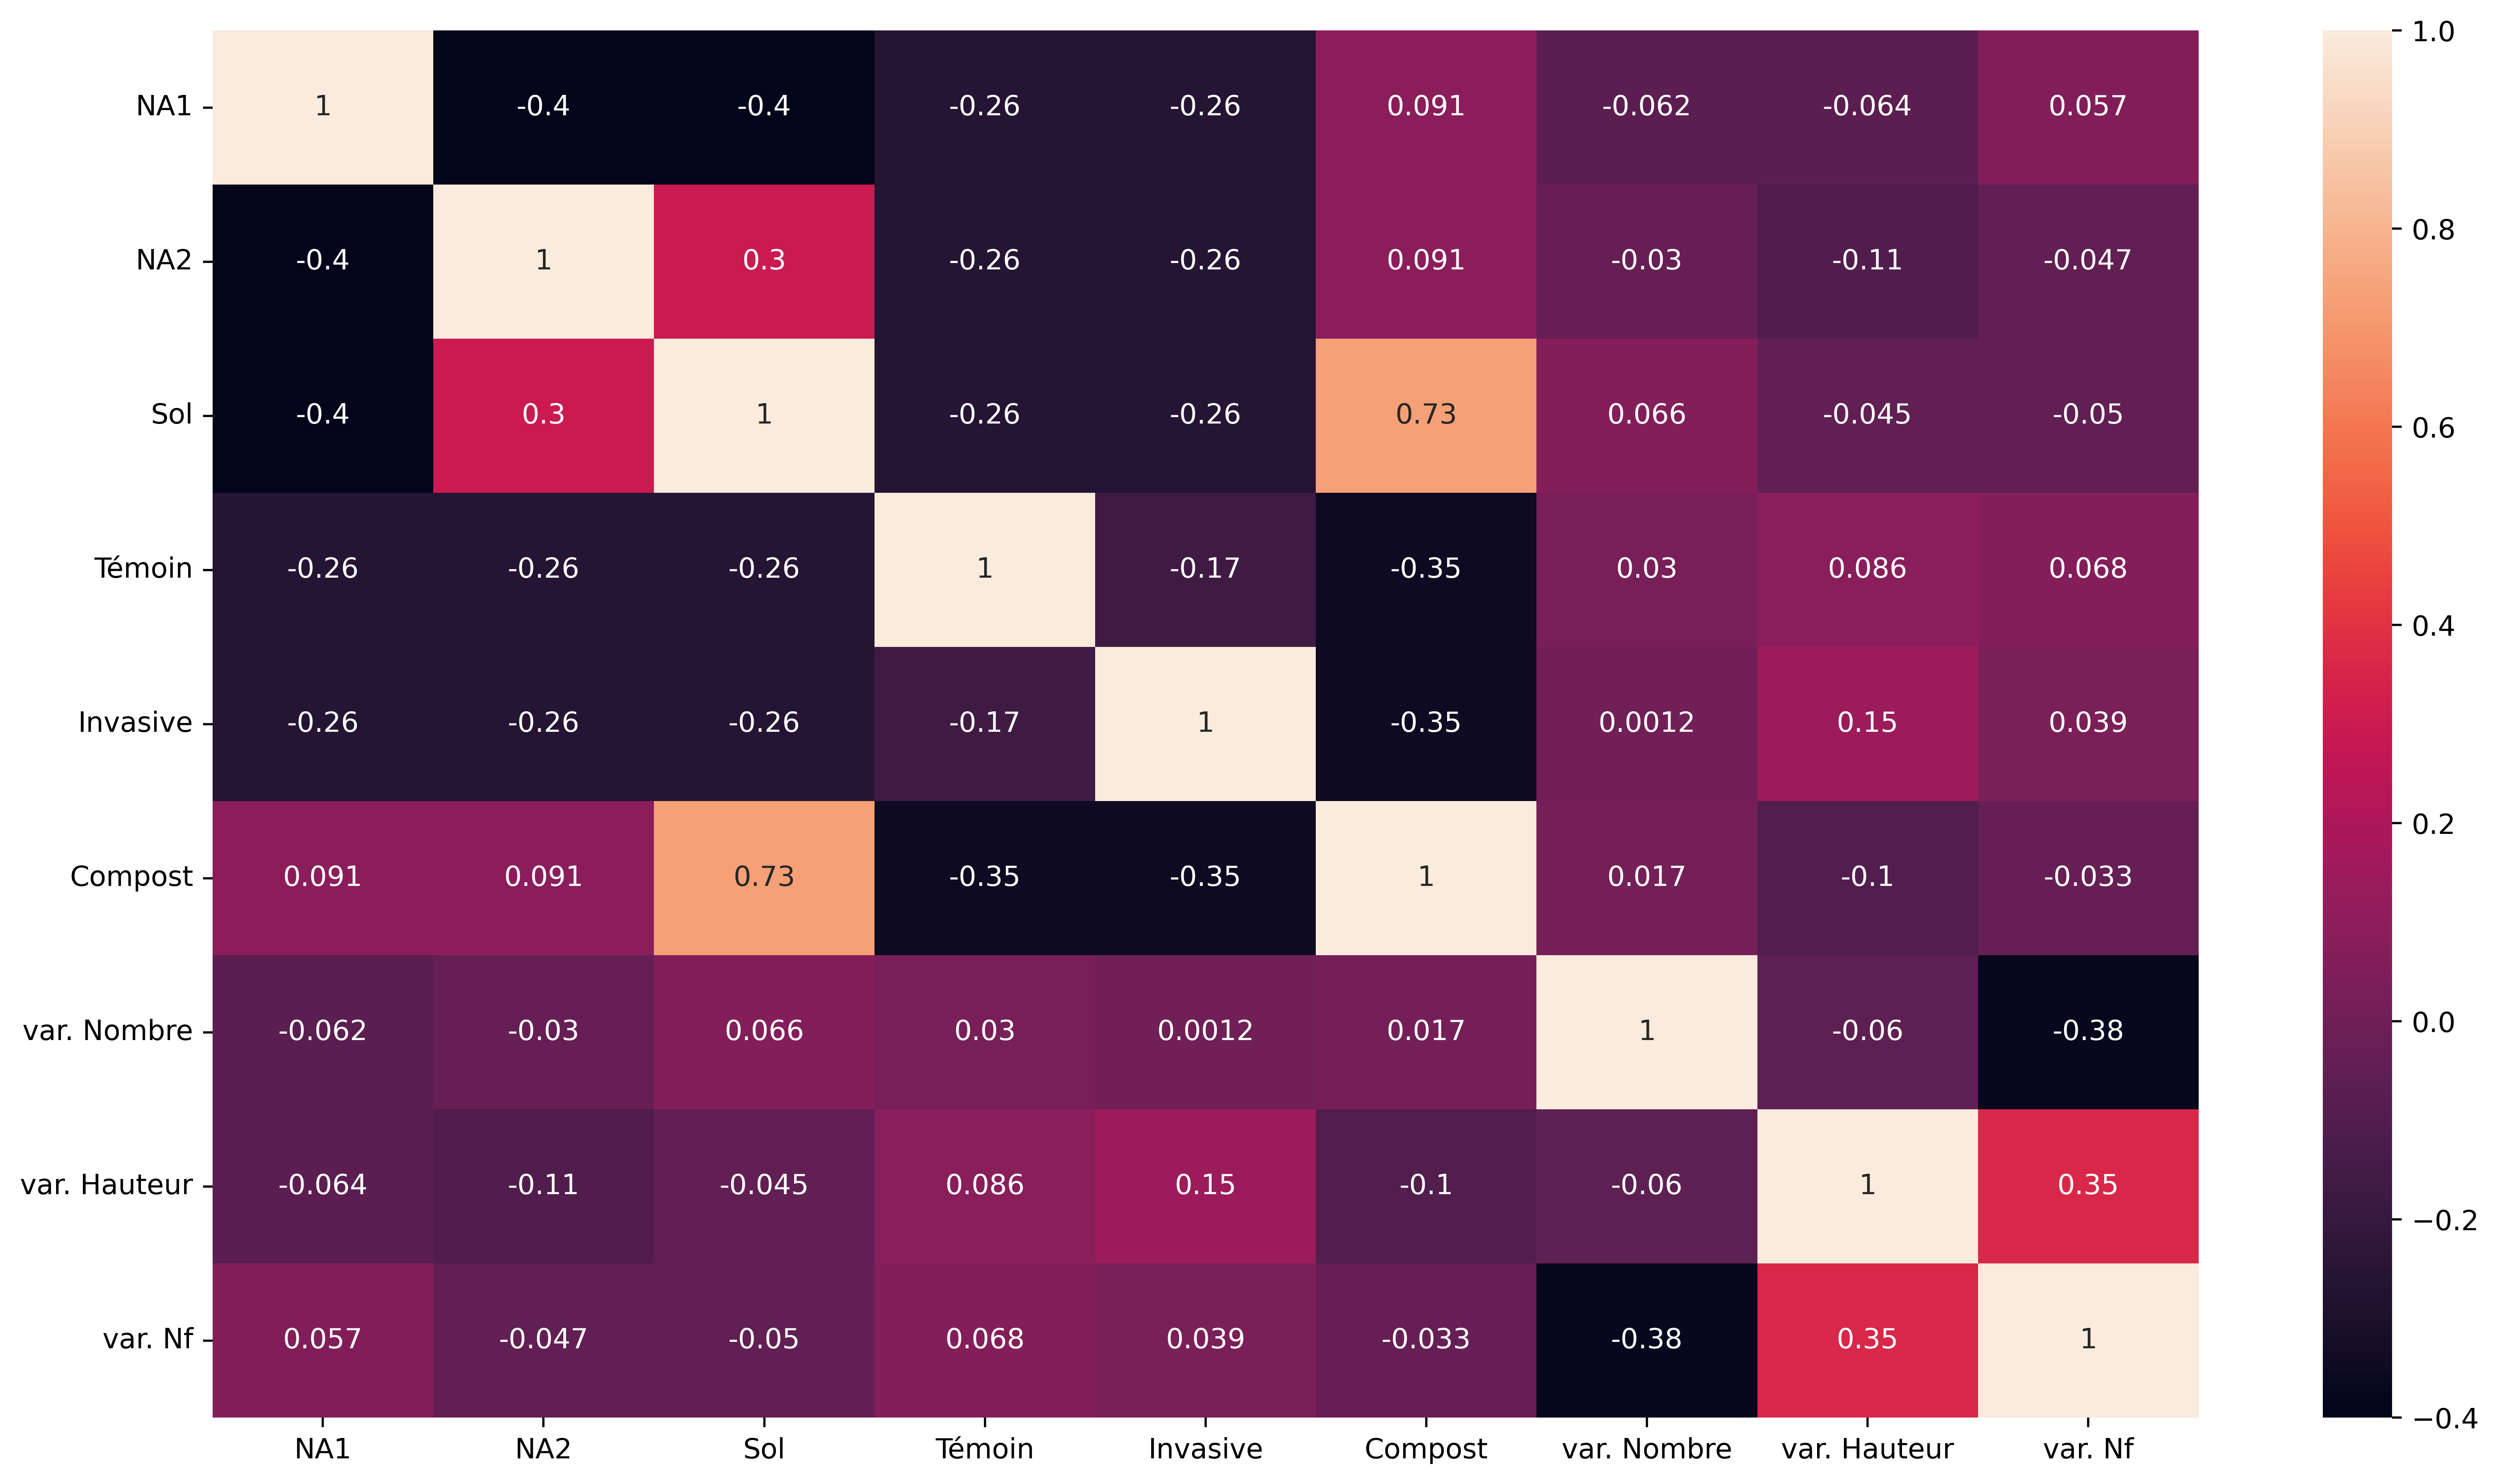

In [4]:
# Create a correlation matrix
corrMatrix = resume_shaped.corr()

# Plot the correlation matrix
plt.figure(figsize=(16,9), dpi=500)
sns.heatmap(corrMatrix, annot=True) 
plt.show()

In [9]:
X=resume_shaped[['var. Nombre','var. Hauteur','var. Nf']]
VN = resume_shaped['var. Nombre']
VH = resume_shaped['var. Hauteur']
VNF = resume_shaped['var. Nf']

#print(VN)
#print(VH)
#print(VNF)
scaler = StandardScaler()

X_std = scaler.fit_transform(X)

In [10]:
# Select the model and its parameters
pca = PCA(n_components=3)

# Fit the model
X_trans=pca.fit_transform(X_std)

# Print the results
print('*************** PCA Summary ***************')
print('No. of features: ', pca.n_features_)
print('No. of samples: ', pca.n_samples_)
print('No. of components: ', pca.n_components_)
print('Explained variance ratio: ', pca.explained_variance_ratio_)

*************** PCA Summary ***************
No. of features:  3
No. of samples:  126
No. of components:  3
Explained variance ratio:  [0.51633699 0.31346136 0.17020164]


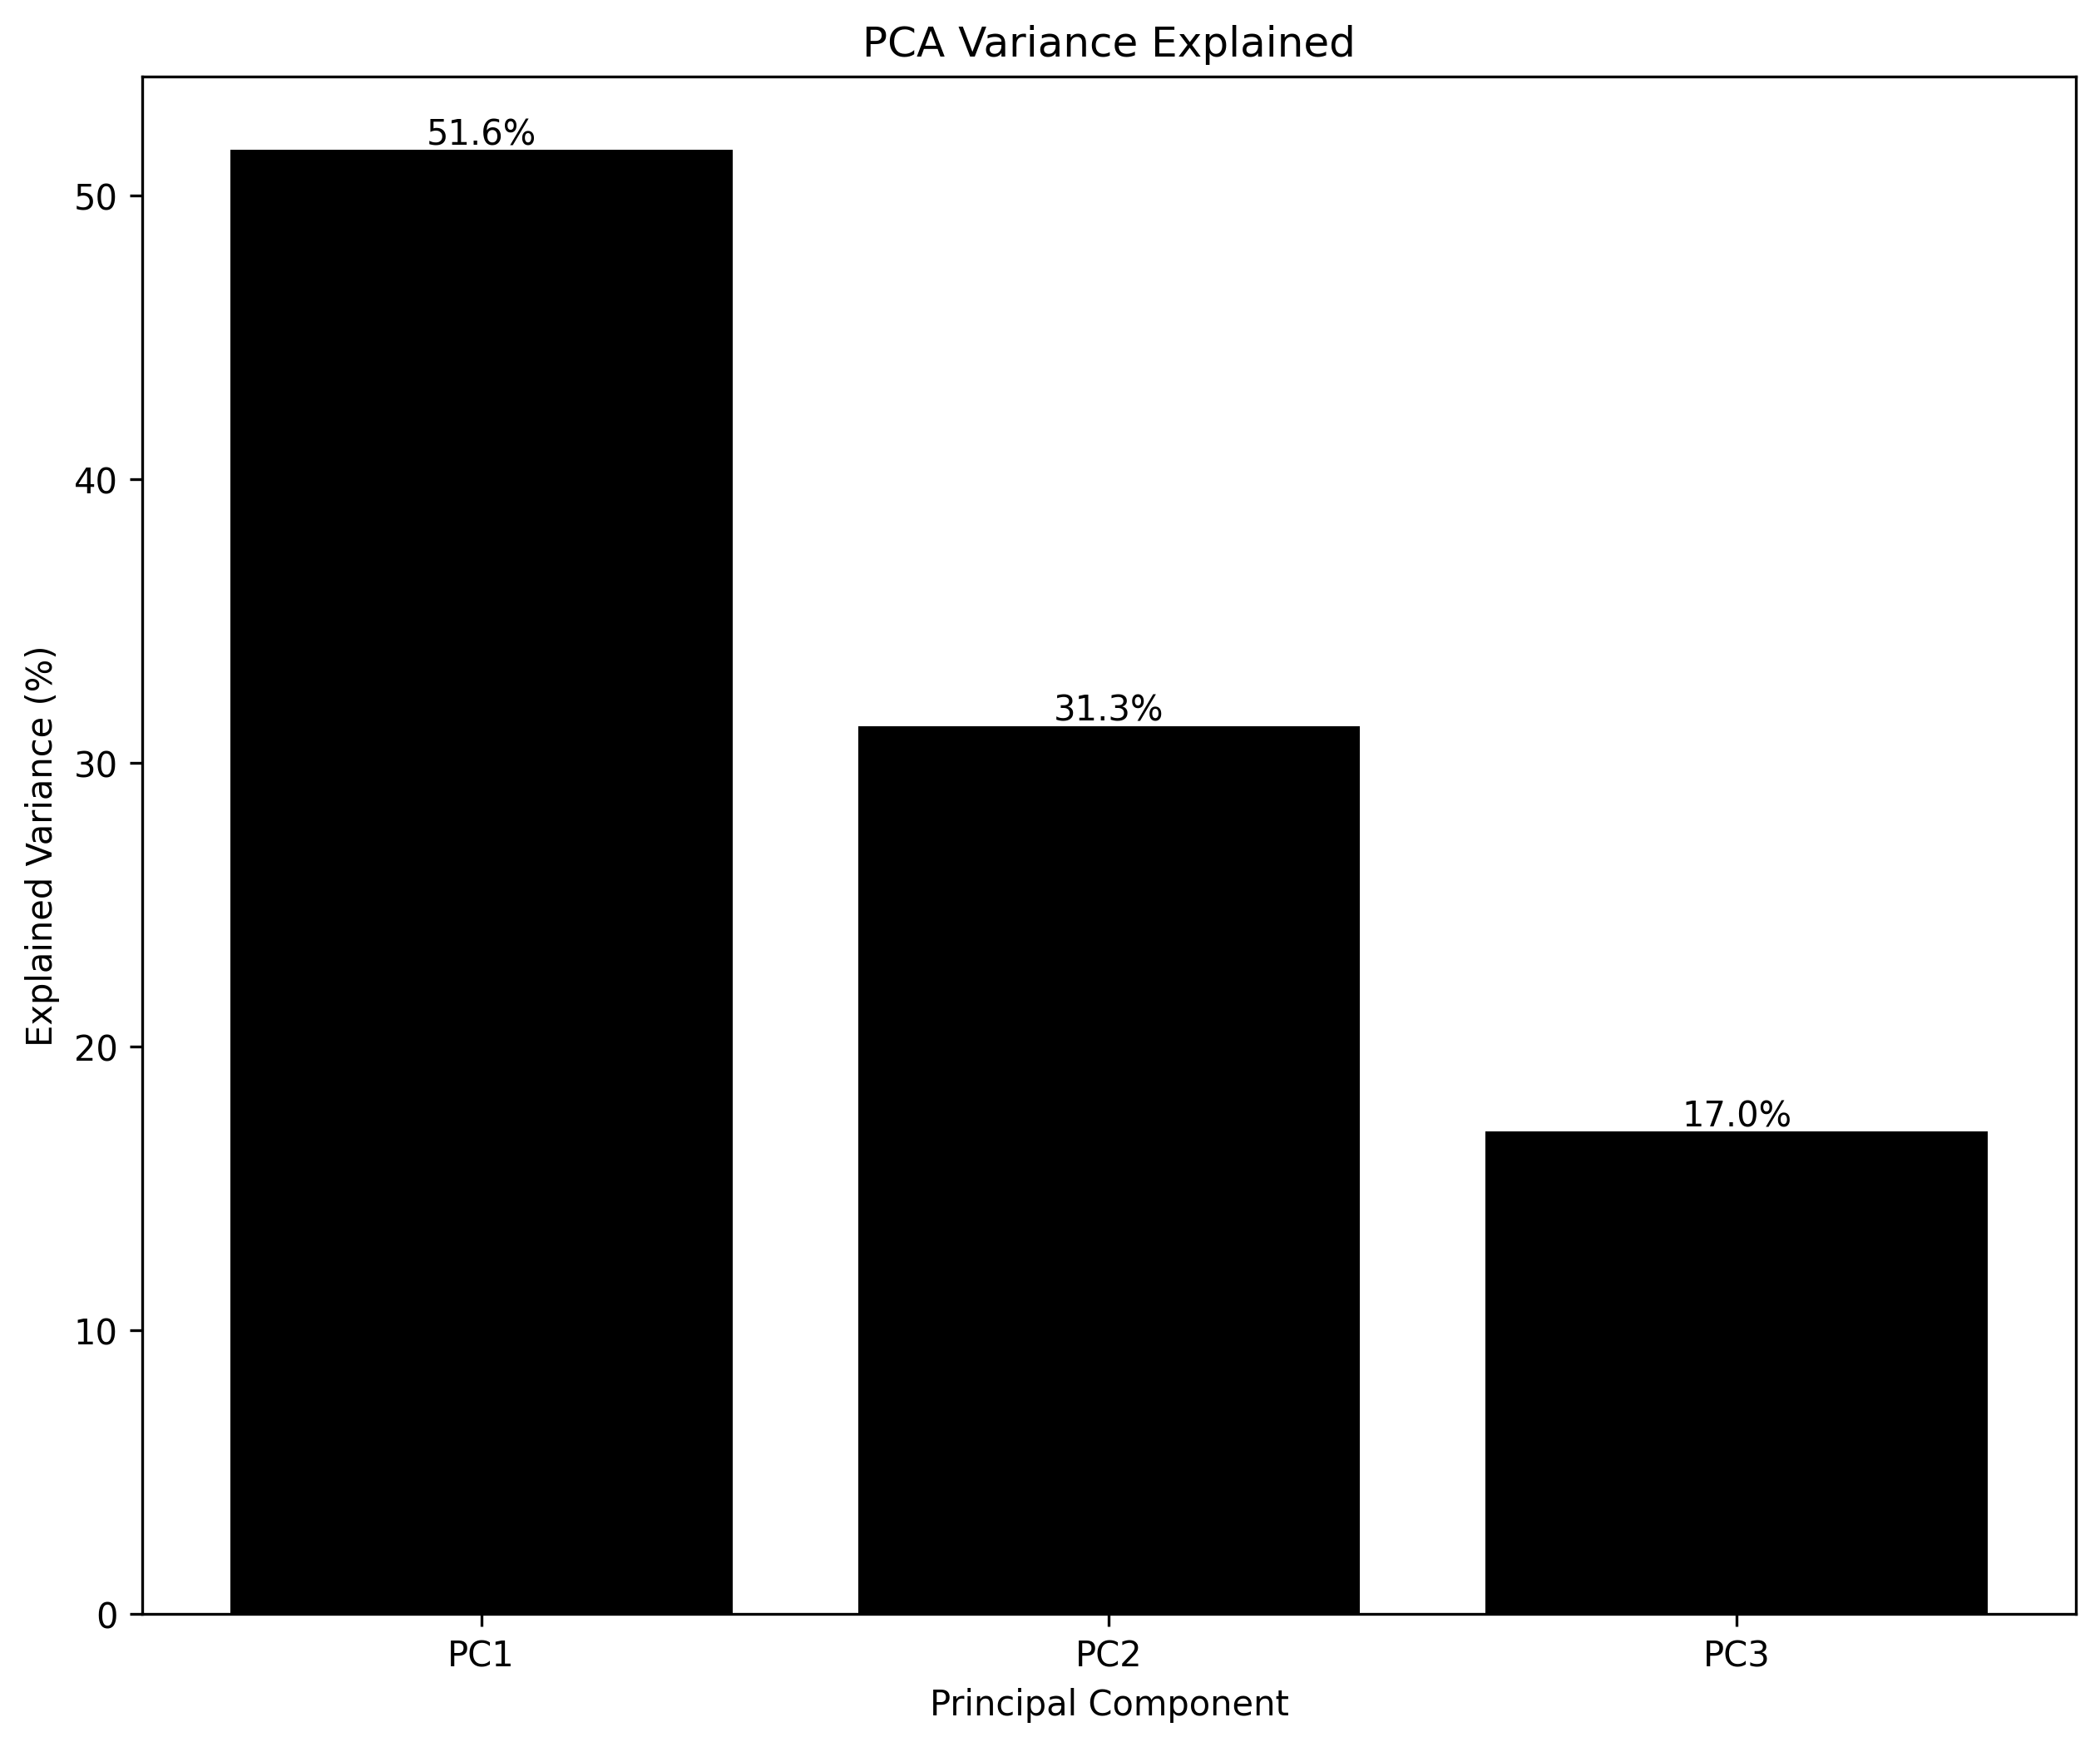

In [11]:
# Plot the explained variance on a bar chart
# Set x and y axis
x_ax=['PC1', 'PC2', 'PC3']
y_ax=pca.explained_variance_ratio_.round(3)*100

# Create a plot
plt.figure(figsize=(10,8), dpi=300)
plt.bar(x=x_ax, height=y_ax, color='black')

# Annotate chart by adding values on top of the bars
for i in range(len(x_ax)):
    plt.text(i,y_ax[i]+0.2,str(y_ax[i].round(3))+'%', ha = 'center')

# Set title for chart and axis        
plt.title('PCA Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')

plt.show()

(126, 2)


<Axes: >

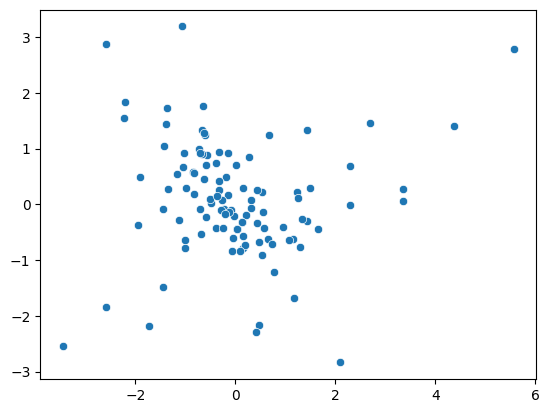

In [12]:
# Nuage de points de PC2 en fonction de PC1
X_acp =np.array([ligne[:2] for ligne in X_trans])
print(X_acp.shape)
#print()
#print(X_acp)
sns.scatterplot(x = X_acp[:,0],y = X_acp[:,1])


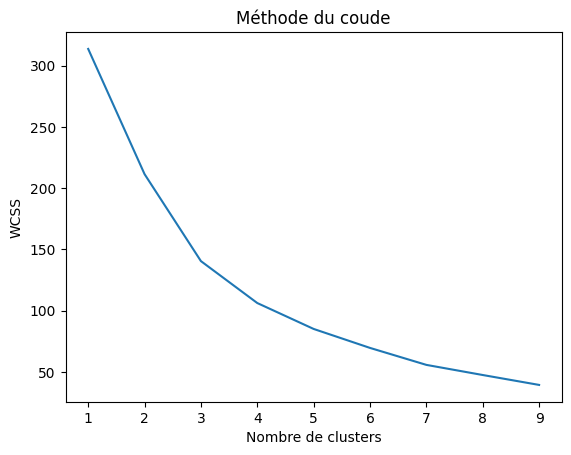

In [13]:
#Méthode du coude pour identifier la valeur optimale de K
# Initialiser la liste des valeurs de WCSS pour différentes valeurs de K
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []

# Calculer WCSS pour différentes valeurs de K
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_acp)
    wcss.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.plot(range(1, 10), wcss)
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

Score silhouette : 0.42396224086601453
[[ 0.10722418 -0.53048171]
 [-0.89287525  0.90699638]
 [ 3.16891562  0.99658434]]
['purple', 'orange', 'orange', 'orange', 'orange', 'orange', 'purple', 'purple', 'orange', 'orange']


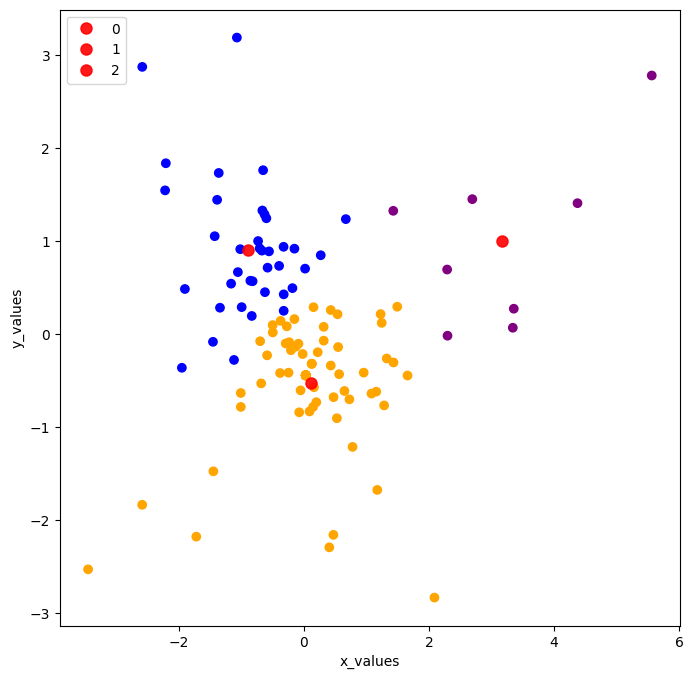

In [14]:
#Clusterisation

clusterer = KMeans(n_clusters=3,random_state=42).fit(X_acp)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(X_acp)

# Calculer le score silhouette
score = silhouette_score(X_acp, c_preds)
print("Score silhouette :", score)
print(centers)

fig = plt.figure(figsize=(8,8))
colors = ['orange','blue', 'purple']
colored = [colors[k] for k in c_preds]
print (colored[0:10])
plt.scatter( X_acp[:,0], X_acp[:,1],  color = colored)
for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [15]:
#correspondance des enregistrements avec nos cluster
clust_prod = resume_shaped.copy()
clust_prod['cluster'] = c_preds

clust_prod.head(10)

Station Date initiale Date finale Réplicat  NA1  NA2  Sol  Témoin  Invasive  \
0      1M       06.2021  04.11.2021        A    1    0    0       0         0   
1      1M       06.2021  04.11.2021        B    1    0    0       0         0   
2      1M       06.2021  04.11.2021        C    1    0    0       0         0   
3      1M    04.11.2021  23.05.2022        A    1    0    0       0         0   
4      1M    04.11.2021  23.05.2022        B    1    0    0       0         0   
5      1M    04.11.2021  23.05.2022        C    1    0    0       0         0   
6      1M       06.2021  04.11.2021        A    0    1    0       0         0   
7      1M       06.2021  04.11.2021        B    0    1    0       0         0   
8      1M       06.2021  04.11.2021        C    0    1    0       0         0   
9      1M    04.11.2021  23.05.2022        A    0    1    0       0         0   

   Compost  var. Nombre  var. Hauteur     var. Nf  cluster  
0        0         12.0     35.500000  -34.375000        2  
1        0          3.0     36.222222  -32.305556        0  
2        0          2.0     62.333333  -20.571429        0  
3        0        -11.0     43.455128   15.253205        0  
4        0          1.0     30.256410   15.673077        0  
5        0         -5.0     36.916667   28.500000        0  
6        0          2.0     29.566667 -256.083333        2  
7        0         14.0     18.245614 -111.070175        2  
8        0          0.0     83.000000 -128.000000        0  
9        0          0.0     60.000000   16.333333        0

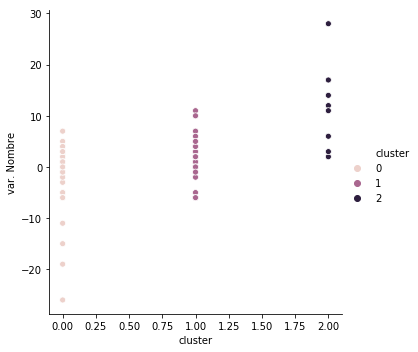

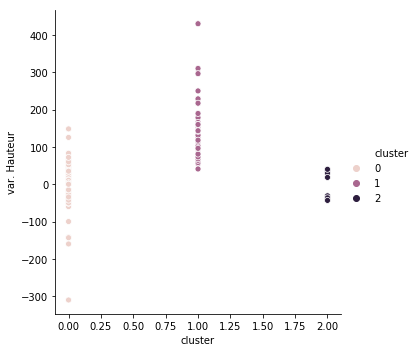

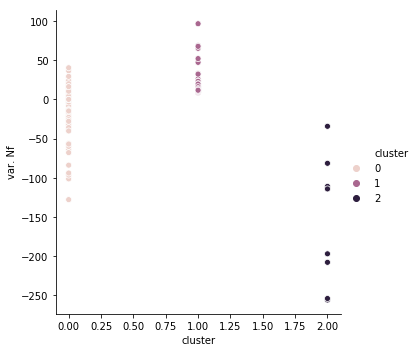

In [11]:

# Tracer des nuages de point représentant les différentes variations des EEE en fonction du cluster
g = sns.relplot(x='cluster', y='var. Nombre', hue='cluster', data=clust_prod, kind="scatter")
g1 = sns.relplot(x='cluster', y='var. Hauteur', hue='cluster', data=clust_prod, kind="scatter")
g = sns.relplot(x='cluster', y='var. Nf', hue='cluster', data=clust_prod, kind="scatter")

#### Interprétation
-  classe 0 : correspond à une stabilisation de l'évolution car le nuage de point est centré en 0
- la classe 1 : Augmentation des EEE, la hauteur et le nb de feuilles son les plus importants
- la classe 2 : Diminution des EEE, Nf < 0 et hauteur stable.


In [21]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn import preprocessing

# séparer les données en: entrées et sorties
X = clust_prod.iloc[:,4:10] #les caractéristiques
y = clust_prod.iloc[:,-1]  #les résulats (classes)
print(X)

X_dum = pd.get_dummies(X)

#print(X_dum)
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.3,  random_state=42)
#Tree CART class
# créer un estimateur
estimator = DecisionTreeClassifier(criterion="entropy", max_depth = None, random_state=42)
# entrainer l'estimateur
estimator.fit(X_train, y_train)

score = estimator.score(X_test, y_test)
print("le score de l'arbre de décision est :", score)

     NA1  NA2  Sol  Témoin  Invasive  Compost
0      1    0    0       0         0        0
1      1    0    0       0         0        0
2      1    0    0       0         0        0
3      1    0    0       0         0        0
4      1    0    0       0         0        0
..   ...  ...  ...     ...       ...      ...
121    0    0    0       1         0        0
122    0    0    0       1         0        0
123    0    0    0       1         0        0
124    0    0    0       1         0        0
125    0    0    0       1         0        0

[126 rows x 6 columns]
le score de l'arbre de décision est : 0.6052631578947368


In [20]:
#Apprcohe en s'occupant seulement de la variation du nombre de plantes
y_vn = clust_prod.iloc[:,-4]
X_train, X_test, y_train, y_test = train_test_split(X_dum, y_vn, test_size=0.3,  random_state=42)
#Tree CART class
# créer un estimateur
estimator = DecisionTreeClassifier(criterion="entropy", max_depth = None, random_state=42)
# entrainer l'estimateur
estimator.fit(X_train, y_train)

score = estimator.score(X_test, y_test)
print("le score de l'arbre de décision est :", score)

le score de l'arbre de décision est : 0.34210526315789475


In [41]:
#Apprcohe en s'occupant seulement de la variation de la hauteur
y_vh = clust_prod.iloc[:,-3]
lab = preprocessing.LabelEncoder()
y_vh_transformed = lab.fit_transform(y_vh)


X_train, X_test, y_train, y_test = train_test_split(X_dum, y_vh_transformed, test_size=0.3,  random_state=42)
#Tree CART class
# créer un estimateur
estimator = DecisionTreeClassifier(criterion="entropy", max_depth = None, random_state=42)
# entrainer l'estimateur
estimator.fit(X_train, y_train)

score = estimator.score(X_test, y_test)
print("le score de l'arbre de décision est :", score)

[41 42 56 49 36 43 35 29 62 54 28 32 38 31 52 57 17 69 50 45 53 33 22 57
 30 48 47 37 44 27 25 25 25 93 85 88 46 40 34 39 51 64 89 66 72 63  4 23
 25 25 25 25 25 25  3 25 25 25 25 25 82 55 25  1  5 25 58 25 68 12 75 26
  2 25 92 91 25  0 90 84 86  7 21  6 11 25 11 59 25 81 25 20 25 60 61 39
 25  8  7 80 67 74 24 10 25 70 82 76 19 18 13 83 65 73 16 24 14 87 71 79
 15 25  9 78 82 77]
le score de l'arbre de décision est : 0.21052631578947367


In [42]:
#Apprcohe en s'occupant seulement de la variation du nombre de feuille
y_vnf = clust_prod.iloc[:,-2]
# on a besoin de transformer les données pour en faire des entiers
#lab = preprocessing.LabelEncoder()
y_vnf_transformed = lab.fit_transform(y_vnf)

X_train, X_test, y_train, y_test = train_test_split(X_dum, y_vnf_transformed, test_size=0.3,  random_state=42)
#Tree CART class
# créer un estimateur
estimator = DecisionTreeClassifier(criterion="entropy", max_depth = None, random_state=42)
# entrainer l'estimateur
estimator.fit(X_train, y_train)

score = estimator.score(X_test, y_test)
print("le score de l'arbre de décision est :", score)

[20 21 28 62 64 82  0  6  4 68 71 86  7 41 50 78 34 90 26 16 73 77 33 92
 47 61  1 80 72 37 36 36 36 81 88 93 87 39  8 27 45 91 79 70 69 85 29 35
 36 36 36 36 36 36 32 36 36 36 36 36 78 57 36 25 31 36 46 36 54 38 58 75
 30 36 84 89 36 22 76 63 74 65 60 83 24 36 13 42 36 48 36 18 36 43 44 40
 36 14 10 59 47 53 23 15 36 47 53 51 12  9  3 59 52 49 11 19  2 66 56 67
 17 36  5 55 51 52]
le score de l'arbre de décision est : 0.21052631578947367


In [29]:


export_graphviz(estimator,
   out_file="arbre_cart0.dot",
    feature_names = X_dum.columns,
    class_names=str(estimator.classes_))



#### Random forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [31]:
clust_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Station        126 non-null    object 
 1   Date initiale  126 non-null    object 
 2   Date finale    126 non-null    object 
 3   Réplicat       126 non-null    object 
 4   NA1            126 non-null    int64  
 5   NA2            126 non-null    int64  
 6   Sol            126 non-null    int64  
 7   Témoin         126 non-null    int64  
 8   Invasive       126 non-null    int64  
 9   Compost        126 non-null    int64  
 10  var. Nombre    126 non-null    float64
 11  var. Hauteur   126 non-null    float64
 12  var. Nf        126 non-null    float64
 13  cluster        126 non-null    int32  
dtypes: float64(3), int32(1), int64(6), object(4)
memory usage: 13.4+ KB


In [69]:

x_train, x_test, y_train, y_test  = train_test_split(X, 
                                                     y, 
                                                     test_size=0.25, 
                                                     random_state=42)

modele_rf = RandomForestClassifier(
     n_estimators=100,
     criterion='gini',
     max_depth=None,
     min_samples_split=2,
     min_samples_leaf=1,
     min_weight_fraction_leaf=0.0,
     max_leaf_nodes=None,
     min_impurity_decrease=0.0,
     bootstrap=True,
     oob_score=False,
     n_jobs=None,
     random_state=None,
     verbose=0,
     warm_start=False,
     class_weight=None)

In [70]:
modele_rf.fit(x_train, y_train)

pd.DataFrame(modele_rf.feature_importances_,
              index = x_train.columns, 
              columns = ["importance"]).sort_values(
     "importance", 
     ascending = False)

importance
NA2         0.245030
Invasive    0.206106
Compost     0.173364
NA1         0.147898
Sol         0.130796
Témoin      0.096806

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix
score = accuracy_score(y_test, modele_rf.predict(x_test))
print("Le pourcentage de bien classés est de : ", score)

Le pourcentage de bien classés est de :  0.5625


In [65]:
x_train, x_test, y_train, y_test  = train_test_split(X, 
                                                     y_vn, 
                                                     test_size=0.25, 
                                                     random_state=42)

modele_rf = RandomForestClassifier(
     n_estimators=100,
     criterion='gini',
     max_depth=None,
     min_samples_split=2,
     min_samples_leaf=1,
     min_weight_fraction_leaf=0.0,
     max_leaf_nodes=None,
     min_impurity_decrease=0.0,
     bootstrap=True,
     oob_score=False,
     n_jobs=None,
     random_state=None,
     verbose=0,
     warm_start=False,
     class_weight=None)


modele_rf.fit(x_train, y_train)

pd.DataFrame(modele_rf.feature_importances_,
              index = x_train.columns, 
              columns = ["importance"]).sort_values(
     "importance", 
     ascending = False)

score = accuracy_score(y_test, modele_rf.predict(x_test))
print("Le pourcentage de bien classés est de : ", score)

Le pourcentage de bien classés est de :  0.34375


In [66]:
x_train, x_test, y_train, y_test  = train_test_split(X, 
                                                     y_vh_transformed, 
                                                     test_size=0.25, 
                                                     random_state=42)

modele_rf = RandomForestClassifier(
     n_estimators=100,
     criterion='gini',
     max_depth=None,
     min_samples_split=2,
     min_samples_leaf=1,
     min_weight_fraction_leaf=0.0,
     max_leaf_nodes=None,
     min_impurity_decrease=0.0,
     bootstrap=True,
     oob_score=False,
     n_jobs=None,
     random_state=None,
     verbose=0,
     warm_start=False,
     class_weight=None)


modele_rf.fit(x_train, y_train)

pd.DataFrame(modele_rf.feature_importances_,
              index = x_train.columns, 
              columns = ["importance"]).sort_values(
     "importance", 
     ascending = False)

score = accuracy_score(y_test, modele_rf.predict(x_test))
print("Le pourcentage de bien classés est de : ", score)

Le pourcentage de bien classés est de :  0.1875


In [67]:
x_train, x_test, y_train, y_test  = train_test_split(X, 
                                                     y_vnf_transformed, 
                                                     test_size=0.25, 
                                                     random_state=42)

modele_rf = RandomForestClassifier(
     n_estimators=100,
     criterion='gini',
     max_depth=None,
     min_samples_split=2,
     min_samples_leaf=1,
     min_weight_fraction_leaf=0.0,
     max_leaf_nodes=None,
     min_impurity_decrease=0.0,
     bootstrap=True,
     oob_score=False,
     n_jobs=None,
     random_state=None,
     verbose=0,
     warm_start=False,
     class_weight=None)


modele_rf.fit(x_train, y_train)

pd.DataFrame(modele_rf.feature_importances_,
              index = x_train.columns, 
              columns = ["importance"]).sort_values(
     "importance", 
     ascending = False)

score = accuracy_score(y_test, modele_rf.predict(x_test))
print("Le pourcentage de bien classés est de : ", score)

Le pourcentage de bien classés est de :  0.21875


## Conclusion :

On constate qu'avec les 3 paramètres combinés (nombre de plante, Hauteur, nombre de feuilles), on a une précision de 56,25% de bien placé, contre 37,5% au maximum lorsqu'on utilise seulement le nombre de plantes 